In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np

import cv2
import math
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate

In [7]:
maskdata = pd.read_csv('./masks_y.csv',header=None)

In [8]:
image = cv2.imread('test.png')

In [9]:
for i in range(maskdata.shape[0]):
    for j in range(maskdata.shape[1]):
        if maskdata.iloc[i][j] != 26:
            maskdata.iloc[i][j] = 0
        else:
            maskdata.iloc[i][j] = 1

KeyboardInterrupt: 

In [4]:
maskdata.head()

,0,1,2,3,4,5,6,7,8,9,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,23,23,23,23,23,23,23,23,23,23,...,21,21,21,21,21,21,21,21,21,21
1,23,23,23,23,23,23,23,23,23,23,...,21,21,21,21,21,21,21,21,21,21
2,23,23,23,23,23,23,23,23,23,23,...,21,21,21,21,21,21,21,21,21,21
3,23,23,23,23,23,23,23,23,23,23,...,21,21,21,21,21,21,21,21,21,21
4,23,23,23,23,23,23,23,23,23,23,...,21,21,21,21,21,21,21,21,21,21


In [11]:
np.unique(maskdata)

array([ 0,  4,  5,  6,  7,  8, 11, 12, 13, 15, 17, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 33])

In [12]:
priority_arr = np.array([17,19,24,26,27,28,29,31,32,33])
priority_class = {}

priority_class[17] = 'pole'
priority_class[19] = 'traffic light'
priority_class[24] = 'person'
priority_class[26] = 'car'
priority_class[27] = 'truck'
priority_class[28] = 'bus'
priority_class[29] = 'caravan'
priority_class[31] = 'train'
priority_class[32] = 'motorcycle'
priority_class[33] = 'bicycle'

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.


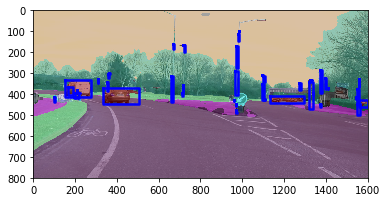

In [16]:
import csv
with open('bboxes.csv', 'w') as writeFile:
    writer = csv.writer(writeFile)
    writer.writerow(['image','x0','y0','x1','y1','x2','y2','class'])
    fig, ax = plt.subplots()

    for i in (priority_arr):
        if i in np.unique(maskdata):
            ax.imshow(image, cmap=plt.cm.gray)
            maskdata1 = maskdata.apply(lambda x: [0 if y != i else 1 for y in x])
            label_img = label(maskdata1)
            regions = regionprops(label_img)


            for props in regions:
                y0, x0 = props.centroid
                orientation = props.orientation
                x1 = x0 + math.cos(orientation) * 0.5 * props.major_axis_length
                y1 = y0 - math.sin(orientation) * 0.5 * props.major_axis_length
                x2 = x0 - math.sin(orientation) * 0.5 * props.minor_axis_length
                y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length

                minr, minc, maxr, maxc = props.bbox
                if(maxr - minr > 1 and maxc - minc > 1):
                    writer = csv.writer(writeFile)
                    writer.writerow(['test.png',x0,y0,minr,minc,maxr,maxc,priority_class[i]])

#         ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
#         ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
#         ax.plot(x0, y0, '.g', markersize=15)

                minr, minc, maxr, maxc = props.bbox
                bx = (minc, maxc, maxc, minc, minc)
                by = (minr, minr, maxr, maxr, minr)
        
        
        
                ax.plot(bx, by, '-b', linewidth=2.5)

                ax.axis((0, 1600, 800, 0))
                plt.hold(True)
plt.show()

In [80]:
bbdata = pd.read_csv('bboxes.csv',header=None)

In [81]:
bbdata.head()

,0,1,2,3,4,5,6,7
0,image,x0,y0,x1,y1,x2,y2,class
1,test.png,981.2826086956521,134.7391304347826,129,980,144,984,pole
2,test.png,671.9108910891089,172.07920792079207,160,670,185,675,pole
3,test.png,725.1656050955414,180.54140127388536,163,722,201,728,pole
4,test.png,975.8972162740899,226.5781584582441,172,972,277,981,pole


In [82]:
bbdata.shape

(35, 8)

In [67]:
maskdata.shape[0]

800

In [35]:
maskdata1 = maskdata.apply(lambda x: [0 if y != 26 else 1 for y in x])


In [5]:
maskdata.shape

(800, 1600)

(331L, 154L, 415L, 276L)
(372L, 332L, 449L, 508L)
(410L, 1134L, 441L, 1294L)
(426L, 1557L, 462L, 1600L)


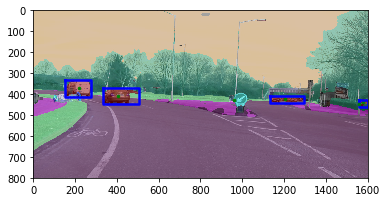

In [51]:
label_img = label(maskdata1)
regions = regionprops(label_img)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
#     orientation = props.orientation
#     x1 = x0 + math.cos(orientation) * 0.5 * props.major_axis_length
#     y1 = y0 - math.sin(orientation) * 0.5 * props.major_axis_length
#     x2 = x0 - math.sin(orientation) * 0.5 * props.minor_axis_length
#     y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length
#     ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
#     ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=5)
    minr, minc, maxr, maxc = props.bbox
    if(maxr - minr > 1 and maxc - minc > 1):
        print(minr,minc,maxr,maxc)
        bx = (minc, maxc, maxc, minc, minc)
        by = (minr, minr, maxr, maxr, minr)
        ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 1600, 800, 0))
plt.savefig('tested.png', dpi=100)
plt.show()